# Visualization of Zeropole Mapping and Orthogonal Balance  on the Riemann Sphere
## Supplementary Material for the Manuscript:  
**Proof Attempt of the Riemann Hypothesis via Zeropole Balance**  

### Author:  
**Attila Csordas**  
AgeCurve Limited, Cambridge, UK   

# Introduction

This Jupyter notebook serves as supplementary material for the GitHub repository accompanying the manuscript titled *Proof Attempt of the Riemann Hypothesis via Zeropole Balance*.

# Visualization of Zeropole Mapping and Orthogonal Balance

This visualization represents the crucial elements of the 2 key theorems of the proof:

## Zeropole Mapping and Orthogonal Balance of $ \zeta(s) $ and $ \zeta^*(s) $
The goal of this visualization is to illustrate the bijection between the **trivial poles** of $ \zeta^*(s) $ on the real axis and the **non-trivial zeros** on the critical line, as established in the 2 key theorems concerning the relation of the two infinite product terms in the modified Hadamard product and in the Shadow Function:

$
\prod_{\rho} \left(1 - \frac{s}{\rho}\right) e^{s/\rho} \prod_{k=1}^\infty \left(1 - \frac{s}{-2k}\right)^{-1},
$

### **Key Visualization Choices:**

1. Orthogonal Balance Representation:
   - The red equatorial circle represents the normalized **real axis**, which contains trivial poles at negative even integers $ s = -2k $.
   - The green vertical circle represents the **critical line**, where the non-trivial zeros are mapped compactly along the imaginary axis $ s = \frac{1}{2} + it $.

2. Mapping Structure:
   - Only the **leftmost segment** of the red circle (negative real axis) is mapped to the **upper half** of the green circle (positive imaginary values) via dashed blue lines. This reflects the actual bijection considered in the proof, which focuses on positive imaginary non-trivial zeros.
   - **Negative imaginary zeros** (the lower half of the critical line) are not mapped explicitly, as they are implicit in the analysis and symmetry considerations.

3. **Compactification Considerations:**
    - The south pole (origin at $ s = 0 $) and the north pole (point at infinity) are highlighted.
    - It is crucial to note that the green critical line does not pass through the north pole or the south pole, emphasizing that the compactified mapping does not reach infinity but instead remains within the normalized Riemann sphere.
    - In the shadow function $ \zeta^*(s) $, a simple pole at the south pole (origin) is introduced, replacing the Dirichlet pole from the original zeta function. This adjustment avoids the essential singularity that would otherwise arise and ensures a well-behaved compactification on the Riemann sphere.
   
4. **Labeling Conventions:**
   - The real axis is oriented so that negative values are on the left and positive values are on the right.
   - The imaginary axis follows a similar convention, with positive values at the top and negative values at the bottom.

### **Geometric Interpretation**
The orthogonality of the zeropole sets in $ \zeta^*(s) $ is highlighted by their perpendicular alignment on the Riemann sphere:

$
\text{Trivial Poles } \perp \text{ Non-Trivial Zeros}
$

This geometric perpendicularity reflects the algebraic independence that is crucial for the divisor balance argument in the proof.

---

The visualization aims to provide an intuitive representation of the dynamic balance and bijection underlying the proof of the Riemann Hypothesis using the zeropole framework.


Plot saved to 


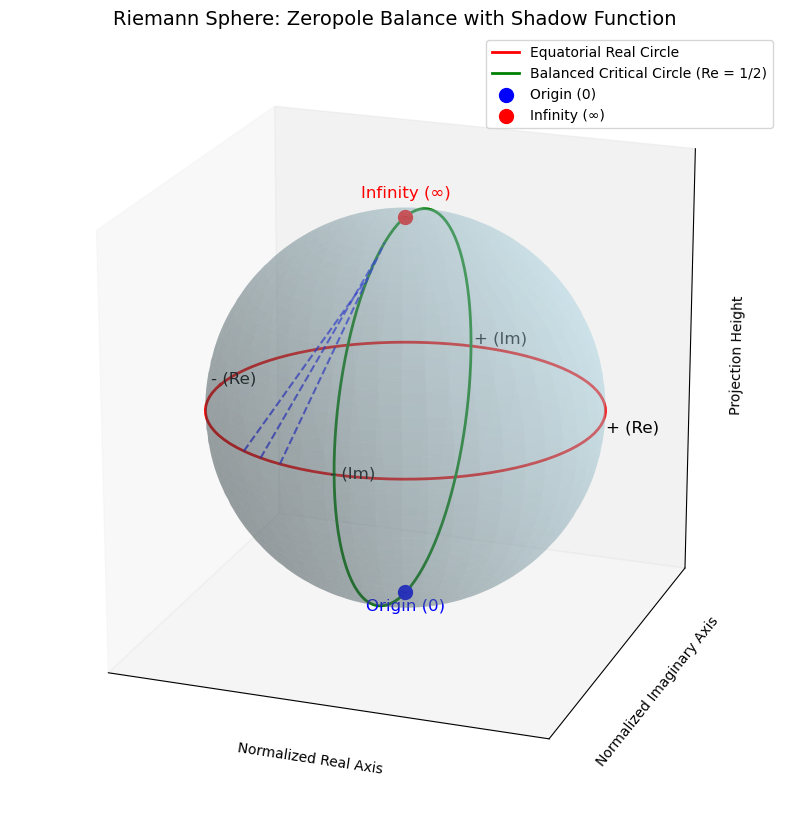

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to map complex numbers onto the Riemann sphere
def riemann_sphere_projection(z):
    x = np.real(z) / (1 + abs(z)**2)
    y = np.imag(z) / (1 + abs(z)**2)
    z = (1 - abs(z)**2) / (1 + abs(z)**2)
    return x, y, z

# Generate points for the real axis (trivial zeros/poles)
real_line = np.linspace(-10, 10, 500) + 0j
x_real, y_real, z_real = riemann_sphere_projection(real_line)

# Generate points for the critical line (non-trivial zeros)
critical_line = 0.5 + 1j * np.linspace(-10, 10, 500)  # Full range to restore the entire circle
x_critical, y_critical, z_critical = riemann_sphere_projection(critical_line)

# Create the Riemann sphere plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the Riemann sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.3)

# Plot the real axis (trivial poles) - equatorial circle in the XY plane
x_eq = np.cos(u)
y_eq = np.sin(u)
z_eq = np.zeros_like(x_eq)
ax.plot(x_eq, y_eq, z_eq, color='red', linewidth=2, label='Equatorial Real Circle')

# Plot the critical line (full vertical circle passing through poles)
x_vert = np.zeros_like(u)
y_vert = np.cos(u)
z_vert = np.sin(u)
ax.plot(x_vert, y_vert, z_vert, color='green', linewidth=2, label='Balanced Critical Circle (Re = 1/2)')

# Adjusted dashed lines mapping from the negative real axis to the upper part of the critical line

# Select specific indices to keep lines in the left upper quarter without crossing
selected_indices = [16, 18, 20]  # Carefully chosen for good separation

for i in selected_indices:
    ax.plot([x_eq[i], x_vert[i]], 
            [y_eq[i], y_vert[i]], 
            [z_eq[i], z_vert[i]], 
            linestyle='dashed', color='blue', alpha=0.7)

# Adjust the viewing angle to position axes correctly
ax.view_init(elev=20, azim=110)  # Rotate to place real axis front-left and imaginary back-right

# Add directional labels for normalized axes with correct placement
ax.text(1.05, 0, 0, "- (Re)", color='black', fontsize=12)  # Real axis left
ax.text(-1.05, 0, 0, "+ (Re)", color='black', fontsize=12)  # Real axis right
ax.text(0, 1.05, 0, "- (Im)", color='black', fontsize=12)   # Imaginary axis left
ax.text(0, -1.05, 0, "+ (Im)", color='black', fontsize=12)  # Imaginary axis right

# Highlight the south pole (origin) and north pole (infinity)
south_pole = np.array([0, 0, -1])  # South pole at (0, 0, -1)
north_pole = np.array([0, 0, 1])   # North pole at (0, 0, 1)

# Plot the south pole (origin)
ax.scatter(*south_pole, color='blue', s=100, label='Origin (0)')
ax.text(0, 0, -1.1, 'Origin (0)', color='blue', fontsize=12, ha='center')

# Plot the north pole (point at infinity)
ax.scatter(*north_pole, color='red', s=100, label='Infinity (∞)')
ax.text(0, 0, 1.1, 'Infinity (∞)', color='red', fontsize=12, ha='center')

# Remove axis numerical ticks for minimalistic style
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Update axis labels to correct orientation
ax.set_xlabel("Normalized Real Axis")
ax.set_ylabel("Normalized Imaginary Axis")
ax.set_zlabel("Projection Height")

# Customize the plot
ax.set_title("Riemann Sphere: Zeropole Balance with Shadow Function", fontsize=14)
ax.legend()

# Adjusting aspect ratio for better visualization
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Save the plot as a PNG file in a specific directory
output_path = ""  # Replace with your directory
plt.savefig(output_path, dpi=300)
print(f"Plot saved to {output_path}")

# Show the plot
plt.show()


# Remark

This finite-scale visualization represents the zeropole balance framework on the compactified Riemann sphere, employing a normalized coordinate system to accommodate the numerical scaling of zeros and poles. While the Riemann mapping theorem allows any meromorphic function to be mapped onto the unit circle, the chosen representation provides an intuitive view of orthogonal relationships between trivial poles and non-trivial zeros in the extended divisor structure. The visualization focuses on a limited range of zeros and poles, whereas their asymptotic tendencies are rigorously established in the Non-Accumulation of Trivial Poles theorem in the manuscript.

# License

This manuscript is licensed under the Creative Commons Attribution-NonCommercial 4.0 International (CC-BY-NC 4.0) License. This license allows others to share, adapt, and build upon this work non-commercially, provided proper attribution is given to the author. For more details, visit https://creativecommons.org/licenses/by-nc/4.0/.